In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Откроем-файлы-и-изучим-их." data-toc-modified-id="Откроем-файлы-и-изучим-их.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откроем файлы и изучим их.</a></span></li><li><span><a href="#Проверим,-что-эффективность-обогащения-рассчитана-правильно.-Вычислим-её-на-обучающей-выборке-для-признака-rougher.output.recovery.-Найдем-MAE-между-нашими-расчётами-и-значением-признака." data-toc-modified-id="Проверим,-что-эффективность-обогащения-рассчитана-правильно.-Вычислим-её-на-обучающей-выборке-для-признака-rougher.output.recovery.-Найдем-MAE-между-нашими-расчётами-и-значением-признака.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака.</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Проанализируем-признаки,-недоступные-в-тестовой-выборке" data-toc-modified-id="Проанализируем-признаки,-недоступные-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проанализируем признаки, недоступные в тестовой выборке</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Проведем-предобработку-данных." data-toc-modified-id="Проведем-предобработку-данных.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проведем предобработку данных.</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.</a></span></li><li><span><a href="#Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-Если-распределения-сильно-отличаются-друг-от-друга,-оценка-модели-будет-неправильной." data-toc-modified-id="Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-Если-распределения-сильно-отличаются-друг-от-друга,-оценка-модели-будет-неправильной.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.</a></span><ul class="toc-item"><li><span><a href="#Вывод:-распределения-не-сильно-отличаются-друг-от-друга" data-toc-modified-id="Вывод:-распределения-не-сильно-отличаются-друг-от-друга-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Вывод: распределения не сильно отличаются друг от друга</a></span></li></ul></li><li><span><a href="#Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Напишем-функцию-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишем функцию для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучим-разные-модели-и-оценим-их-качество-кросс-валидацией.-Выберем-лучшую-модель-и-проверим-её-на-тестовой-выборке.-Опишем-выводы." data-toc-modified-id="Обучим-разные-модели-и-оценим-их-качество-кросс-валидацией.-Выберем-лучшую-модель-и-проверим-её-на-тестовой-выборке.-Опишем-выводы.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке. Опишем выводы.</a></span><ul class="toc-item"><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#RandomForestRegressor---обучение-2-х-отдельных-моделей-для-каждого-из-таргета" data-toc-modified-id="RandomForestRegressor---обучение-2-х-отдельных-моделей-для-каждого-из-таргета-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>RandomForestRegressor - обучение 2-х отдельных моделей для каждого из таргета</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#Константная-модель" data-toc-modified-id="Константная-модель-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Константная модель</a></span></li><li><span><a href="#BaggingRegressor" data-toc-modified-id="BaggingRegressor-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>BaggingRegressor</a></span></li></ul></li><li><span><a href="#Вывод:-обучены-несколько-меделей-регрессии-и-оценена-метрика-sMAPE.-Лучшая-модель---BaggingRegressor,-у-нее-sMAPE-ниже,-чем-у-константной-модели-." data-toc-modified-id="Вывод:-обучены-несколько-меделей-регрессии-и-оценена-метрика-sMAPE.-Лучшая-модель---BaggingRegressor,-у-нее-sMAPE-ниже,-чем-у-константной-модели-.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод: обучены несколько меделей регрессии и оценена метрика sMAPE. Лучшая модель - BaggingRegressor, у нее sMAPE ниже, чем у константной модели .</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Откроем файлы и изучим их.

In [52]:
test_frame = pd.read_csv('/datasets/gold_recovery_test.csv')
train_frame = pd.read_csv('/datasets/gold_recovery_train.csv')
full_frame = pd.read_csv('/datasets/gold_recovery_full.csv')

In [35]:
train_frame.shape, test_frame.shape, full_frame.shape

((16860, 87), (5856, 53), (22716, 87))

In [11]:
train_frame.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [12]:
train_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [13]:
train_frame.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>ОК, данные на базе и на месте первичный аналитический осмотр)

### Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака.

In [7]:
C = 'rougher.output.concentrate_au'
F = 'rougher.input.feed_au'
T = 'rougher.output.tail_au'
def recovery(row):
    try:
        return (row[C]*(row[F]-row[T])/(row[F]*(row[C]-row[T]))*100)
    except:
        return np.nan

In [8]:
train_frame = train_frame.dropna(subset=[ 'rougher.output.recovery'])
train_frame = train_frame.dropna(subset=[ 'final.output.recovery'])
train_frame['recovery'] = train_frame.apply(recovery, axis=1)
mean_absolute_error(train_frame['recovery'], train_frame['rougher.output.recovery'])

9.46896498277233e-15

#### Вывод: 
Судя по малому размеру вычисленного MAE, эффективность обогащения на обучающей выборке для признака rougher.output.recovery рассчитана правильно

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>есть контакт)

### Проанализируем признаки, недоступные в тестовой выборке

In [9]:
col_2  = [i for i in train_frame.columns if (i not in test_frame.columns)]

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [10]:
train_frame['rougher.calculation.floatbank10_sulfate_to_au_feed'].describe()

count     14148.000000
mean       3456.608298
std        5772.510248
min        -486.598675
25%        2527.093354
50%        2975.892211
75%        3716.360822
max      629638.977914
Name: rougher.calculation.floatbank10_sulfate_to_au_feed, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa40c1dbd90>,
      dtype=object)

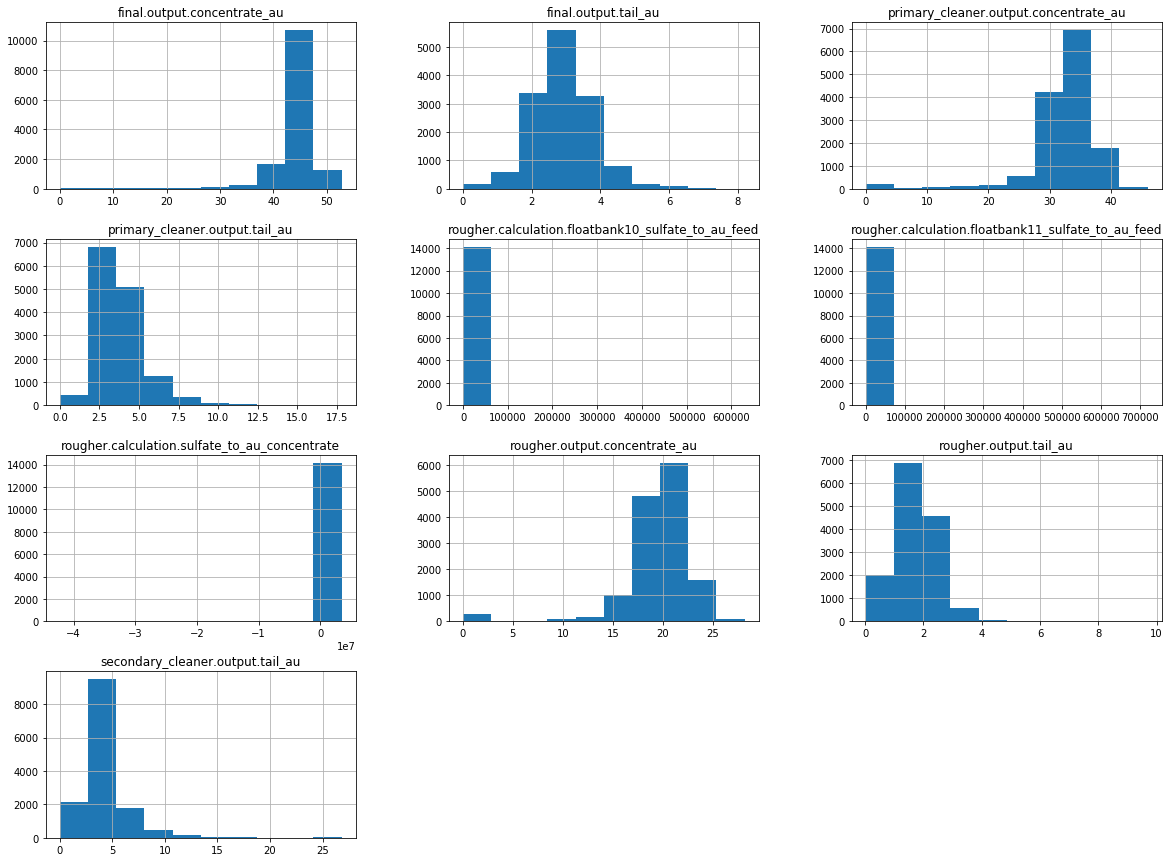

In [11]:
cols_au = [i for i in col_2 if (('_au' or 'au_') in i)]
train_frame[cols_au].hist(figsize=(20,15), bins=10)

In [12]:
col_3 = ['final.output.recovery', 'rougher.output.recovery']
cols_au = [i for i in col_2 if ('_au' or 'au_' in i)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa40b937d10>,
      dtype=object)

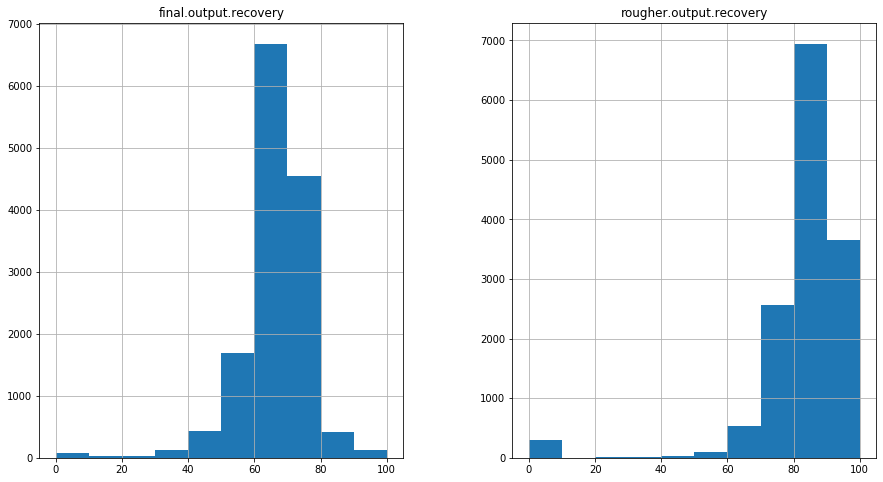

In [13]:
train_frame[col_3].hist(figsize=(15,8), bins=10)

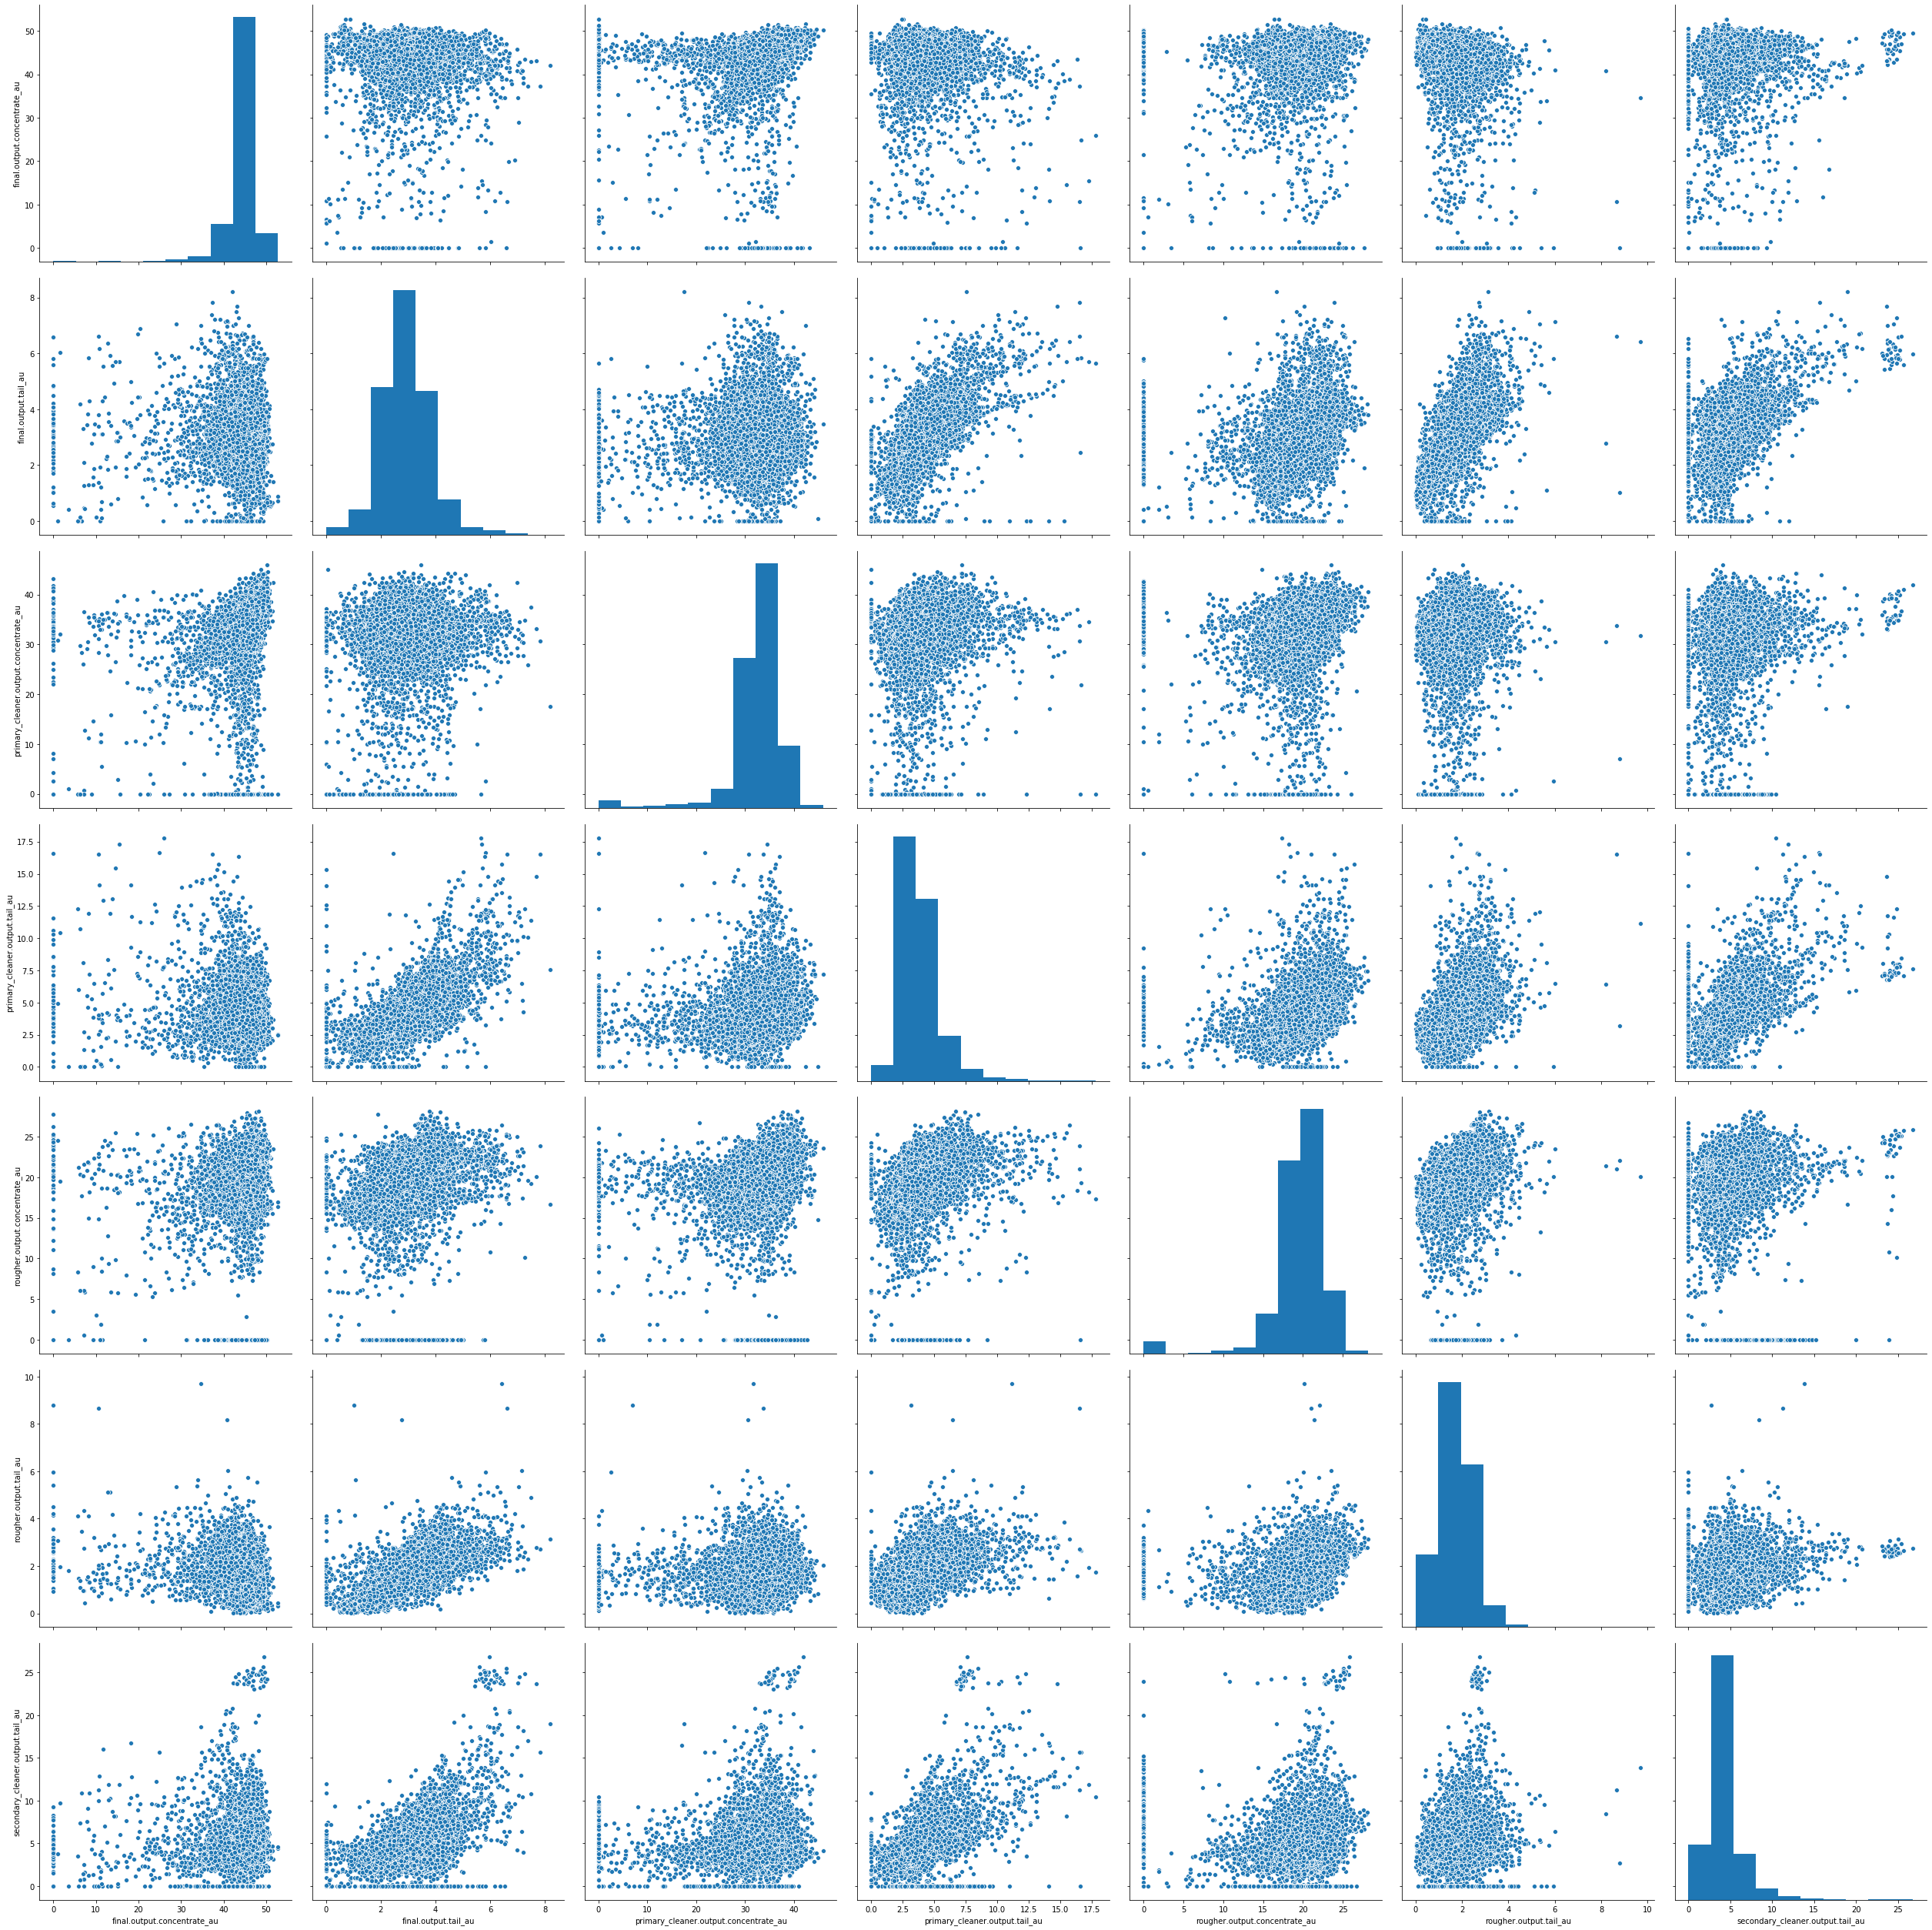

In [14]:
sns.pairplot(train_frame[['final.output.concentrate_au',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_au',
 'rougher.output.concentrate_au',
 'rougher.output.tail_au',
 'secondary_cleaner.output.tail_au']], height=5)

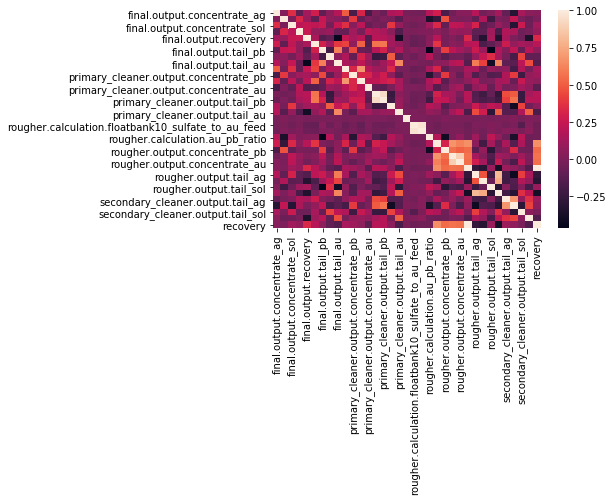

In [15]:
sns.heatmap(train_frame[cols_au].corr())

#### Вывод:
Недоступные в тестовой выборке признаки описывают параметры продукта и расчётные характеристики для следующих этапов: флотация и первичная, вторичная очистки и финальные характеристики 

### Проведем предобработку данных.

In [36]:
train_frame = train_frame.fillna(method='bfill')
test_frame = test_frame.fillna(method='bfill')
full_frame = full_frame.fillna(method='bfill')

In [53]:
train_frame = train_frame.dropna()
test_frame = test_frame.dropna()
full_frame = full_frame.dropna()

Поиск пропусков:

In [17]:
train_frame[train_frame.isnull()==True].count().sum(),test_frame[test_frame.isnull()==True].count().sum(), full_frame[full_frame.isnull()==True].count().sum()

(0, 0, 0)

In [15]:
train_frame.shape, test_frame.shape, full_frame.shape

((16860, 87), (5856, 53), (22716, 87))

Деление датафреймов на трэйн и таргет пока не будем проводить, т.к. ниже (пункт 2.3) нам предстоит удалить некоторые объекты с аномально низкой суммарной концентрацией веществ. Деление датафреймов на трэйн и таргет будет проведено в пункте 2.3

## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 

ougher.input.feed_…, rougher.output.concentrate_…, primary_cleaner.output.concentrate_…, final.output.concentrate_… - это всё концентрации.

Лучше всего строить графики для этих 4-ех типов концентраций для каждого отдельного металла на одном графике. Так будет наиболее информативно

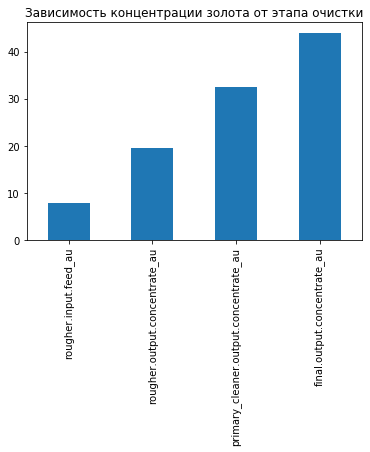

In [19]:
train_frame[['rougher.input.feed_au', 'rougher.output.concentrate_au',
             'primary_cleaner.output.concentrate_au',
             'final.output.concentrate_au' ]].agg(np.mean).plot(kind='bar', title='Зависимость концентрации золота от этапа очистки')

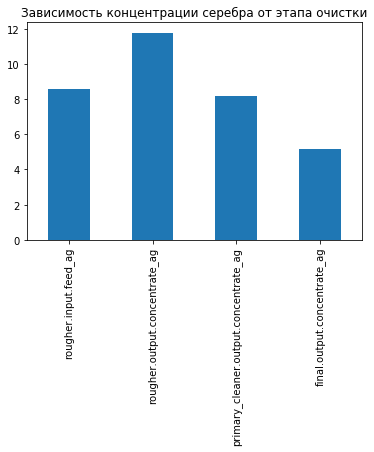

In [20]:
train_frame[['rougher.input.feed_ag', 'rougher.output.concentrate_ag',
             'primary_cleaner.output.concentrate_ag',
             'final.output.concentrate_ag' ]].agg(np.mean).plot(kind='bar', title='Зависимость концентрации серебра от этапа очистки')

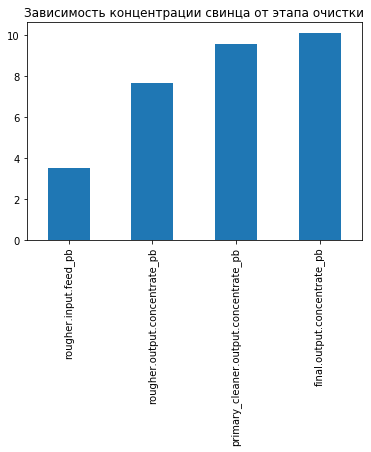

In [21]:
train_frame[['rougher.input.feed_pb', 'rougher.output.concentrate_pb',
             'primary_cleaner.output.concentrate_pb',
             'final.output.concentrate_pb' ]].agg(np.mean).plot(kind='bar', title='Зависимость концентрации свинца от этапа очистки')

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

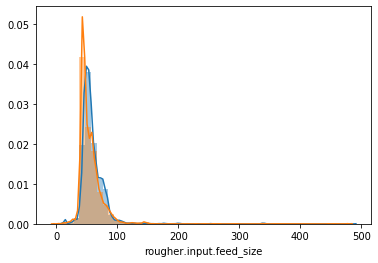

In [22]:
sns.distplot(train_frame['rougher.input.feed_size'])
sns.distplot(test_frame['rougher.input.feed_size'])

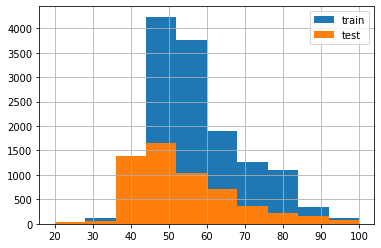

In [23]:
train_frame['rougher.input.feed_size'].hist(range = (20, 100), bins=10)
test_frame['rougher.input.feed_size'].hist(range = (20, 100), bins=10)
plt.legend(['train', 'test'])
plt.show()

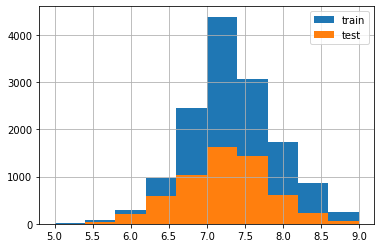

In [24]:
train_frame['primary_cleaner.input.feed_size'].hist(range = (5, 9), bins=10)
test_frame['primary_cleaner.input.feed_size'].hist(range = (5, 9), bins=10)
plt.legend(['train', 'test'])
plt.show()

#### Вывод: распределения не сильно отличаются друг от друга

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [25]:
def rougher_sum (row):
    try:
        return(row['rougher.input.feed_pb'] + row['rougher.input.feed_ag'] + row['rougher.input.feed_au'] + row['rougher.input.feed_sol'])
    except:
        return (np.nan)
train_frame['rougher_sum'] = train_frame.apply(rougher_sum, axis=1)
train_frame['rougher_sum'].describe()

count    14149.000000
mean        56.235165
std          7.044797
min          0.040000
25%         52.566699
50%         56.616769
75%         60.771094
max         74.458253
Name: rougher_sum, dtype: float64

In [26]:
train_frame['rougher_sum'].quantile(0.001)

14.979097846285882

In [27]:

train_frame = train_frame.drop(train_frame[train_frame['rougher_sum']<=train_frame['rougher_sum'].quantile(0.001)].index)

In [28]:
def conc_sum (row):
    try:
        return(row['rougher.output.concentrate_pb'] + row['rougher.output.concentrate_ag'] + row['rougher.output.concentrate_au'] + row['rougher.output.concentrate_sol'])
    except:
        return (np.nan)
train_frame['conc_sum'] = train_frame.apply(conc_sum, axis=1)
train_frame['conc_sum'].describe()

count    14134.000000
mean        67.245551
std         12.555796
min          0.000000
25%         64.935818
50%         69.183622
75%         73.435011
max         88.140119
Name: conc_sum, dtype: float64

In [29]:
train_frame['conc_sum'].quantile(0.001)

0.0

In [30]:
train_frame = train_frame.drop(train_frame[train_frame['conc_sum']<=train_frame['conc_sum'].quantile(0.001)].index)

In [31]:
def final_sum (row):
    try:
        return(row['final.output.concentrate_pb'] + row['final.output.concentrate_ag'] + row['final.output.concentrate_au'] + row['final.output.concentrate_sol'])
    except:
        return (np.nan)
train_frame['final_sum'] = train_frame.apply(final_sum, axis=1)
train_frame['final_sum'].describe()

count    13839.000000
mean        68.420502
std          6.885500
min          0.000000
25%         67.548421
50%         69.133481
75%         70.949354
max         80.210644
Name: final_sum, dtype: float64

In [32]:
train_frame['final_sum'].quantile(0.001)

0.0

In [33]:
train_frame = train_frame.drop(train_frame[train_frame['final_sum']<=train_frame['final_sum'].quantile(0.001)].index)

In [54]:
#делим трэйн на фичи и таргет
train_features = train_frame[test_frame.columns].drop(['date'], axis=1)
train_target = train_frame[['rougher.output.recovery', 'final.output.recovery']]
#делим тэст на фичи и таргет
test_features = test_frame.drop(['date'], axis=1)
targets_to_join = full_frame[['date', 'rougher.output.recovery', 'final.output.recovery']].copy()
test_frame = test_frame.join(targets_to_join.set_index('date'), on='date')
test_target = test_frame[['rougher.output.recovery', 'final.output.recovery']]
test_frame.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


In [44]:
test_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 2 columns):
rougher.output.recovery    5856 non-null float64
final.output.recovery      5856 non-null float64
dtypes: float64(2)
memory usage: 91.6 KB


In [18]:
#масштабируем фичи на трейне и на тесте
scaler = StandardScaler()
scaler.fit(train_features)
train_features[train_features.columns] = scaler.transform(train_features[train_features.columns])
test_features[test_features.columns] = scaler.transform(test_features[test_features.columns])

In [55]:
train_features.shape, test_features.shape

((11017, 52), (5383, 52))

In [46]:
test_target

,rougher.output.recovery,final.output.recovery
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078
...,...,...
5851,95.172585,68.919891
5852,94.575036,68.440582
5853,93.018138,67.092759
5854,92.599042,68.061186


## Модель

### Напишем функцию для вычисления итоговой sMAPE

In [56]:
def smape(y_true, y_pred):
    error = abs(y_true - y_pred)
    scale = (abs(y_true) + abs(y_pred)) / 2
    result = (error / scale).mean()*100
    return result
 

def smape_weighted(y_true, y_pred):
    y_true.reset_index(drop=True, inplace=True)
    y_pred = pd.DataFrame(data=y_pred)
    rougher = smape(y_true.iloc[:, 0], y_pred.iloc[:, 0])
    final = smape(y_true.iloc[:, 1], y_pred.iloc[:, 1])
    return 0.25 * rougher + 0.75 * final

### Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке. Опишем выводы.

#### RandomForestRegressor

In [59]:
scorer = make_scorer(smape_weighted, greater_is_better = False)
new_model = RandomForestRegressor(random_state=12345, criterion='mae')
grid = GridSearchCV(new_model, param_grid={'max_depth':[5, None]}, cv=3, scoring=scorer, n_jobs=-1)

new_model.fit(train_features, train_target)
smape_weighted(test_target, new_model.predict(test_features))

10.257710152675607

In [32]:
smape_weighted(train_target, new_model.predict(train_features))

5.3839197660917595

In [33]:
test_target.mean(), train_target.mean()

(rougher.output.recovery    83.587917
 final.output.recovery      64.536291
 dtype: float64,
 rougher.output.recovery    80.235783
 final.output.recovery      63.190545
 dtype: float64)

In [ ]:
*

#### RandomForestRegressor - обучение 2-х отдельных моделей для каждого из таргета

In [45]:
s = make_scorer(smape, greater_is_better = False)

In [46]:
def check(grid, X_train, y_train, X_test, y_test):
    grid_r, grid_f = grid, grid
    grid_r.fit( X_train, y_train.iloc[:, 0])
    grid_f.fit( X_train, y_train.iloc[:, 1])
    smape_r = smape(y_test.iloc[:, 0], grid_r.predict(X_test))
    smape_f = smape(y_test.iloc[:, 1], grid_f.predict(X_test))
    smape_finally = 0.25 * smape_r  + 0.75 * smape_f
    print('Метрика sMAPE:', smape_finally)
    return (grid_r.best_estimator_, grid_f.best_estimator_)

In [47]:
model = RandomForestRegressor(random_state=12345)
grid = GridSearchCV(model, param_grid={'criterion':['mae', 'mse']}, cv=3, scoring=s, n_jobs=-1)

In [48]:
%%time
check(grid, train_features, train_target, test_features, test_target)

Метрика sMAPE: 24.04285273342345
CPU times: user 23min 4s, sys: 435 ms, total: 23min 4s
Wall time: 23min 59s


(RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False),
 RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False))

#### LinearRegression

In [49]:
model = LinearRegression()
grid = GridSearchCV(model, param_grid={'fit_intercept': [True, False],
                                       'normalize': [True, False],
                                       'copy_X' :[True, False] }, cv=5, scoring=s, n_jobs=-1)

In [50]:
%%time
check(grid, train_features, train_target, test_features, test_target)

Метрика sMAPE: 22.37242070954092
CPU times: user 15.5 s, sys: 12.2 s, total: 27.8 s
Wall time: 27.8 s


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True))

#### Константная модель

In [57]:
#константная модель для rougher
dummy_regr_rougher = DummyRegressor(strategy="median")
dummy_regr_rougher.fit(train_features, train_target.iloc[:, 0])
smape_dummy_rougher = smape(test_target.iloc[:, 0], dummy_regr_rougher.predict(test_features))
#константная модель для final
dummy_regr_final = DummyRegressor(strategy="median")
dummy_regr_final.fit(train_features, train_target.iloc[:, 1])
smape_dummy_final = smape(test_target.iloc[:, 1], dummy_regr_final.predict(test_features))
#итоговый smape
smape_dummy = 0.25 * smape_dummy_rougher + 0.75 * smape_dummy_final
print(smape_dummy)

8.512288888970577


In [58]:
#получим то же самое значение более коротким способом, обучив только одну дамми модель
dummy_regr = DummyRegressor(strategy="median")
dummy_regr.fit(train_features, train_target)
smape_dummy = smape_weighted(test_target, dummy_regr.predict(test_features))
print(smape_dummy)

8.512288888970577


#### BaggingRegressor

In [51]:
regr = BaggingRegressor(random_state=12345, n_jobs=-1) 
grid = GridSearchCV(regr, param_grid={'base_estimator': [SVR(), DecisionTreeRegressor()], 'n_estimators': [10, 20]}, cv=3, scoring=s, n_jobs=-1)

In [ ]:
%%time
check(grid, train_features, train_target, test_features, test_target)

### Вывод: обучены несколько меделей регрессии и оценена метрика sMAPE. Лучшая модель - BaggingRegressor, у нее sMAPE ниже, чем у константной модели .

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке